In [1]:
import pandas as pd
file_path=r"C:\Users\Swetha\Downloads\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns

In [4]:
#categorical vs categorical analysis
#continent vs case_status
cont=visa_df['continent'].value_counts()
cont
case=visa_df['case_status'].value_counts()
case


case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [5]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con3=con1&con2
len(visa_df[con3])


11012

In [6]:
visa_df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [7]:
continents=visa_df['continent'].value_counts().keys()
continents

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [8]:
for i in continents:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=con1&con2
    print(f' In {i} the certified count is {len(visa_df[con3])}')

 In Asia the certified count is 11012
 In Europe the certified count is 2957
 In North America the certified count is 2037
 In South America the certified count is 493
 In Africa the certified count is 397
 In Oceania the certified count is 122


In [9]:
certified,denied=[],[]
for i in visa_df['continent'].unique():
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    cert=con1&con2
    den=con1&con3
    certified.append(len(visa_df[cert]))
    denied.append(len(visa_df[den]))
    print(f'in {i} certified :{len(visa_df[cert])} , denied :{len(visa_df[den])}')

certified,denied
    


in Asia certified :11012 , denied :5849
in Africa certified :397 , denied :154
in North America certified :2037 , denied :1255
in Europe certified :2957 , denied :775
in South America certified :493 , denied :359
in Oceania certified :122 , denied :70


([11012, 397, 2037, 2957, 493, 122], [5849, 154, 1255, 775, 359, 70])

In [10]:
#certified dataframe
continents=visa_df['continent'].unique()
cd_df=pd.DataFrame(zip(continents,certified),columns=['continents','no_of_certified'])
cd_df

,continents,no_of_certified
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [11]:
#denied dataframe
continents=visa_df['continent'].unique()
d_df=pd.DataFrame(zip(continents,denied),columns=['continents','no_of_denied'])
d_df

,continents,no_of_denied
0,Asia,5849
1,Africa,154
2,North America,1255
3,Europe,775
4,South America,359
5,Oceania,70


In [12]:
# certified and denied dataframe
continents=visa_df['continent'].unique()
cont_case_analysis=pd.DataFrame(zip(certified,denied),columns=['no.of_certified','no.of_denied'],index=continents)
cont_case_analysis

,no.of_certified,no.of_denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**cross tab**
- it takes 2 arguments
- 1.index 
- 2.column
- index==continent
- column==case status

In [13]:
ind_column=visa_df['continent']
col_column=visa_df['case_status']
analysis=pd.crosstab(ind_column,col_column)
analysis

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

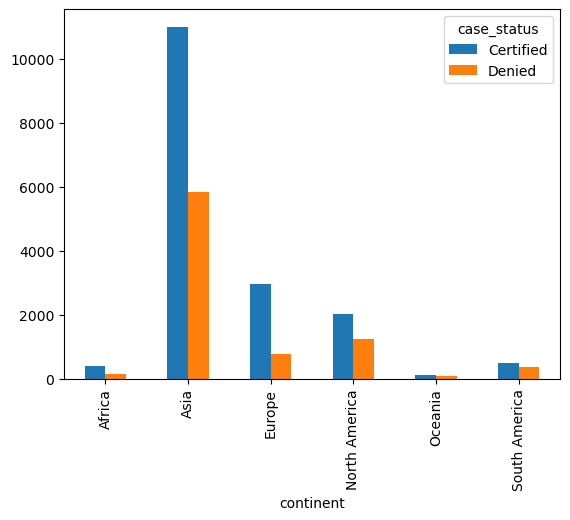

In [14]:
analysis.plot(kind='bar')

<Axes: >

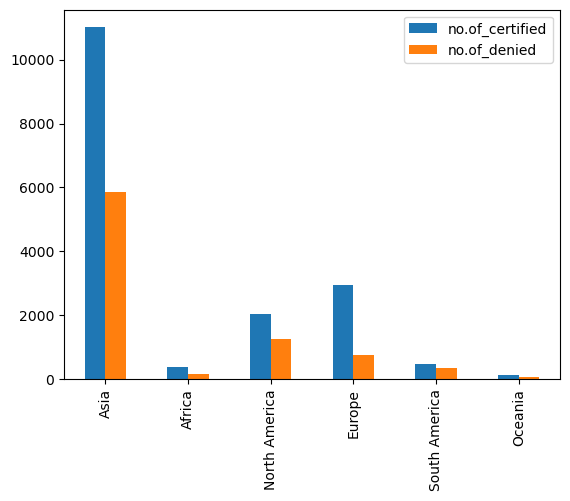

In [15]:
cont_case_analysis.plot(kind='bar')

**multivariate analysis**
- Education
- continent
- Case status
- we already know from Asia there 11k Accepted visa
- In that I want furthur break down based on education
- here also pd.cross tab
- first fix your index of any one column out of three column
- Then keep two column in a list and pass as data column

In [16]:
ind_col=visa_df['continent']
data_column=[visa_df['education_of_employee'],visa_df['case_status']]
multi_analysis=pd.crosstab(ind_col,data_column)
multi_analysis

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

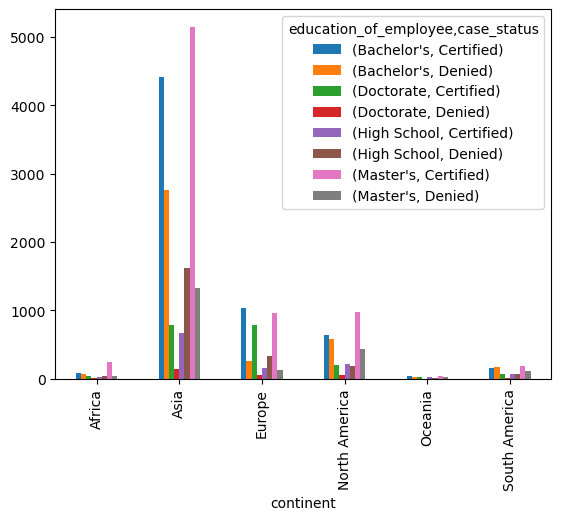

In [17]:
multi_analysis.plot(kind='bar')

<Axes: >

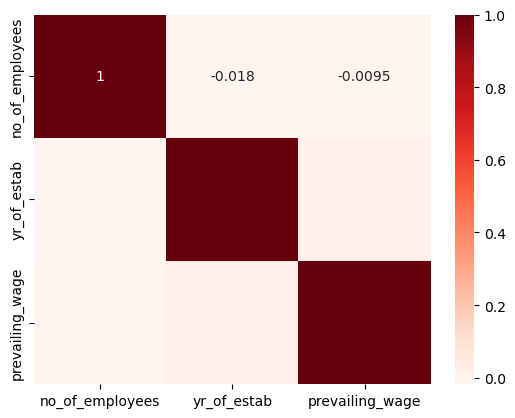

In [18]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='Reds')

**numerical vs numerical **
- to understand the relation we use scatter plot
- scatter plot gives the relation blw 2 numerical columns
- bar chart
- pie chart
- histogram
- scatter plot
- scatter plot under matplotlib package **plt.scattter**


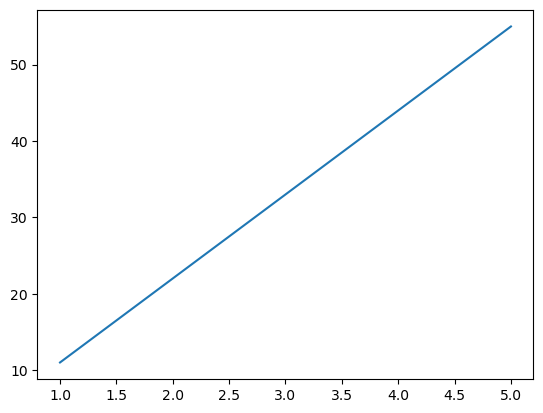

In [20]:
x=[1,2,3,4,5]
y=[11,22,33,44,55]
#plt.scatter(x,y)
plt.plot(x,y)
plt.show()